# Function Value Calculator

This is a very simple example of neural network. Its purpose is to approximate an unknown single valued function using a dense deep network. 
In this notebook we have worked on training a network for a function based on the input and output we got from that function.

In [27]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

"**hiddenfunction**" is the definition of the function you want to approximate by means of a neural network (NN). The definition is hidden to the NN, who can only access it as a blackbox, to get training samples. 

This is implemented by means of a generator (a special kind of function), taking in input a number (batchsize) and returning a pair of input output vectors of length batchsize. Each input is a random number in the interval [-pi,pi] and the output is computed by means of "**hiddenfunction**".

In [28]:
def hiddenfunction(x):
  # define your favourite function
  # output in range 0-1 if last activation is a sigmoid!
  return (np.sin(x)**2 + np.cos(x)/3 + 1)/3
  
def generator(batchsize):
    while True:
      inputs = np.random.uniform(low=-np.pi, high=np.pi, size=batchsize)
      outputs = np.zeros(batchsize)  # Creating output array
      for i in range(0, batchsize):
          outputs[i] = hiddenfunction(inputs[i])
      yield (inputs,outputs)

If you want to see an example of a generated batch, you need to invoke next on the generator

In [29]:
print(next(generator(5)))

(array([ 2.02111567,  0.27419676, -2.20087321,  1.65031484, -2.41671861]), array([0.55515681, 0.46473315, 0.48547765, 0.65573729, 0.39669864]))


Now we define the network. The function we want to approximate is single valued, so the network will have a single input and a single output, and its (dense) structure is completely defined by a 
list specifying the number of neurons per layer


In [30]:
input_layer = Input(shape=(1, ))
x = Dense(20, activation='relu')(input_layer)
x = Dense(30, activation='relu')(x)
x = Dense(20, activation='relu')(x)
output_layer = Dense(1, activation='relu')(x)

model = Model(input_layer, output_layer)

The below cell is an alternative implementation of this network with more modular definition.

In [31]:
# size of hidden layers (one for each of them)
inner_layers_dims = [20,30,20]

input_layer = Input(shape=(1,))
x = input_layer  ## We have defined it before
for i in range(0, len(inner_layers_dims)):
  x = Dense(inner_layers_dims[i], activation='relu')(x)
output_layer = Dense(1, activation='relu')(x)

model1 = Model(input_layer,output_layer)

We can now have a look at the model we just generated:

In [32]:
model.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 20)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 30)             │           630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,311 (5.12 KB)

 Trainable params: 1,311 (5.12 KB)

 Non-trainable params: 0 (0.00 B)

Try to be sure you correctly understand the number of learning parameters for each layer. 
For a dense layer with n input neurons and m output neurons, your have nxm weights + m biases.
For instance, for a 20-to-30 layer, we have 20x30+30 = 630 parameters.

We are finally ready to compile our model and train it.
As loss function we use mean square error (mse). 
The "optimizer" is the technique used to tune the learning rate during backpropagation: you may ignore it for the moment.

In [33]:
model.compile(optimizer='adam', loss='mse')

In [36]:
batchsize = 64

model.fit(generator(batchsize), steps_per_epoch=1000, epochs=10)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0237
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.8274e-06
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.2538e-06
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.6531e-06
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.8192e-06
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.9113e-06
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.3959e-06
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.3686e-06
Epoch 9/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.5489e-06
Epoch 10/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.9644e-06


**Issues you might occur**
- 'Functional' object has no attribute 'fit_generator'
    - The error message "'Functional' object has no attribute 'fit_generator'" suggests that you're trying to call the `fit_generator()` method on a functional model object.

       In Keras, a functional model is created using the `keras.Model` class and by specifying the input and output layers explicitly. It doesn't have a `fit_generator()` method. Instead, you should use the `fit()` method to train a functional model.

       Here's how you can train a functional model using the `fit()` method:

        ```python
        model.compile(optimizer='adam', loss='mse')  # Compile the model with appropriate optimizer and loss function

        # Train the model
        model.fit(generator(batchsize), steps_per_epoch=1000, epochs=10)
        ```


        Replace `model` with the name of your functional model object. If you're using a Sequential model, which is created using 
        `keras.Sequential`, then you can use `fit_generator()` method. Make sure you're using the appropriate model type for your training 
        procedure.

If everything is working correctly, the loss should decrease during training. If it doesn't, it means that, for some reason, the network is not learning.

We are finally ready to check the result of the approximation. We plot the hidden function in red, and the approximation computed by the network in blue.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


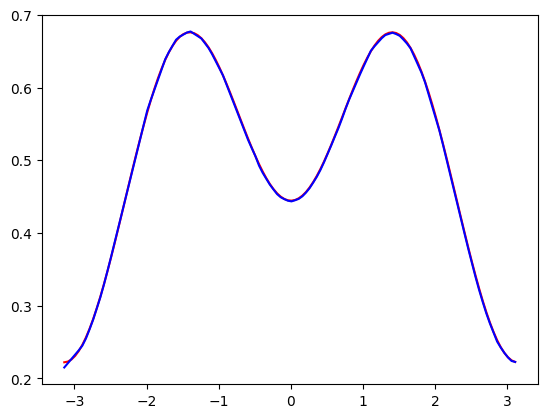

In [39]:
x = np.arange(-np.pi,np.pi,0.05)
y = [hiddenfunction(a) for a in x]
z = [z[0] for z in model.predict(np.array(x))]
plt.plot(x,y,'r',x,z,'b')
plt.show()


As the plot suggests, we have fitted our network to the data very well.

Now is your turn. Modify:

1. the definition of the hidden function
2. the number of layers/neurons per layer.

Have fun.